In [1]:
import numpy as np
import matplotlib.pyplot as plt

from hnc_n_multiscale import  HNC_solver

# Two Species

Here we do QSP interactions between electrons and one ion type. 

Using $\tilde{r}\equiv r/r_s$, we implement potentials 
\begin{align}
\beta v_{ee}(\tilde{r}) &=  \frac{\Gamma_{ee}}{\tilde{r}}\left( 1- \exp[-\tilde{r} r_s/\Lambda_e]\right) +  \ln2 \exp\left[-\tilde{r}^2 r_s^2/(\pi \Lambda_e^2 \ln 2)\right]\\
\beta v_{ei}(\tilde{r}) &=  \frac{\Gamma_{ei}}{\tilde{r}}\left( 1- \exp[-\tilde{r} r_s/\Lambda_e]\right)\\
\beta v_{ii}(\tilde{r}) &=  \frac{\Gamma_{ii}}{\tilde{r}}
\end{align}
For  
\begin{align}
\Gamma_{ee}&=\frac{\beta e^2}{r_s}\\
\Gamma_{ei}&=\frac{\beta Z_i e^2}{r_s}\\
\Gamma_{ii}&=\frac{\beta Z_i^2 e^2}{r_s}\\
\end{align}

Define physical constants

In [2]:
# k_B = 1.380649e-23  # Boltzmann constant [J/K]
# hbar=  6.62607015e-34 # Planck [J/s]
eV = 0.0367512 # So 4 eV = 4 * 0.036.. in natural units
Kelvin = 8.61732814974493e-5*eV #Similarly, 1 Kelvin = 3.167e-6... in natural units 
π = np.pi
# [AU]
rs  = 3
T   = 1*eV 
Zstar=3

β   = 1/T
m_e = 1


Λe  = np.sqrt(  β*2*π /m_e )
Γee = β/rs 
Γei = Zstar*β/rs 
Γii = Zstar**2*β/rs 
print(Γee, Γei, Γii)

9.069998621360211 27.20999586408063 81.6299875922419


Plug into get potentials

In [3]:
def βvee(r):
    return Γee/r*(1- np.exp(-r*rs/Λe))+ np.log(2) * np.exp(-r**2 * rs**2/( π*Λe**2*np.log(2)))

def βvee(r):
    return np.exp(-r/(5))*Γee/r*(1- np.exp(-r*rs/Λe))+ np.log(2) * np.exp(-r**2 * rs**2/( π*Λe**2*np.log(2)))


def βvei(r):
    return -Γei/r*(1- np.exp(-r*rs/Λe))

def βvei_atomic(r):
    r_c = 3/5 #3/5 r_s in linear n_b(r) model
    return (Γei/r*np.heaviside(r - r_c,0.5)  )*  (1- np.exp(-r*rs/Λe))

def βvii(r):
    return Γii/r 

def βvii(r):
    return Γii/r * np.exp(-r/(5)) 
    

First, we initialize the hnc

In [4]:
N_species = 2
Gamma = np.array(  [[Γii,  Γei],
                    [Γei,  Γee]])

names = ["Ion-1", "Electron", ] 
kappa = 3
rho = np.array([  3/(4*np.pi), 3/(4*np.pi) ])
hnc2 = HNC_solver(N_species, Gamma=Gamma, kappa=kappa, tol=1e-4,
                 kappa_multiscale=2, rho = rho, num_iterations=int(1e4), 
                 R_max=10, N_bins=1000, names=names)


then we create the potential matrix, βu_matrix 

In [5]:
hnc2.βu_r_matrix[0,0] = βvii(hnc2.r_array)
hnc2.βu_r_matrix[1,0] = βvei(hnc2.r_array)
hnc2.βu_r_matrix[0,1] = βvei(hnc2.r_array)
hnc2.βu_r_matrix[1,1] = βvee(hnc2.r_array)

In [6]:
hnc2.HNC_solve(alpha=1)


Err in c_r: 428.956
Err in c_r: 46.095
Err in c_r: 14.151
Err in c_r: 7.226
Err in c_r: 4.544
Err in c_r: 3.252
Err in c_r: 2.416
Err in c_r: 1.861
Err in c_r: 1.453
Err in c_r: 1.154
Err in c_r: 0.925
Err in c_r: 0.747
Err in c_r: 0.607
Err in c_r: 0.495
Err in c_r: 0.405
Err in c_r: 0.332
Err in c_r: 0.272
Err in c_r: 0.224
Err in c_r: 0.184
Err in c_r: 0.151
Err in c_r: 0.124
Err in c_r: 0.102
Err in c_r: 0.083
Err in c_r: 0.068
Err in c_r: 0.056
Err in c_r: 0.046
Err in c_r: 0.038
Err in c_r: 0.031
Err in c_r: 0.025
Err in c_r: 0.021
Err in c_r: 0.017
Err in c_r: 0.014
Err in c_r: 0.011
Err in c_r: 0.009
Err in c_r: 0.008
Err in c_r: 0.006
Err in c_r: 0.005
Err in c_r: 0.004
Err in c_r: 0.003
Err in c_r: 0.003
Err in c_r: 0.002
Err in c_r: 0.002
Err in c_r: 0.002
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.000
Err in c_r: 0.000
Err in c_r: 0.000
Err in c_r: 0.000
Err in c_r: 0.000
Err in c_r: 0.000
Err in c_r: 0.000
Err in

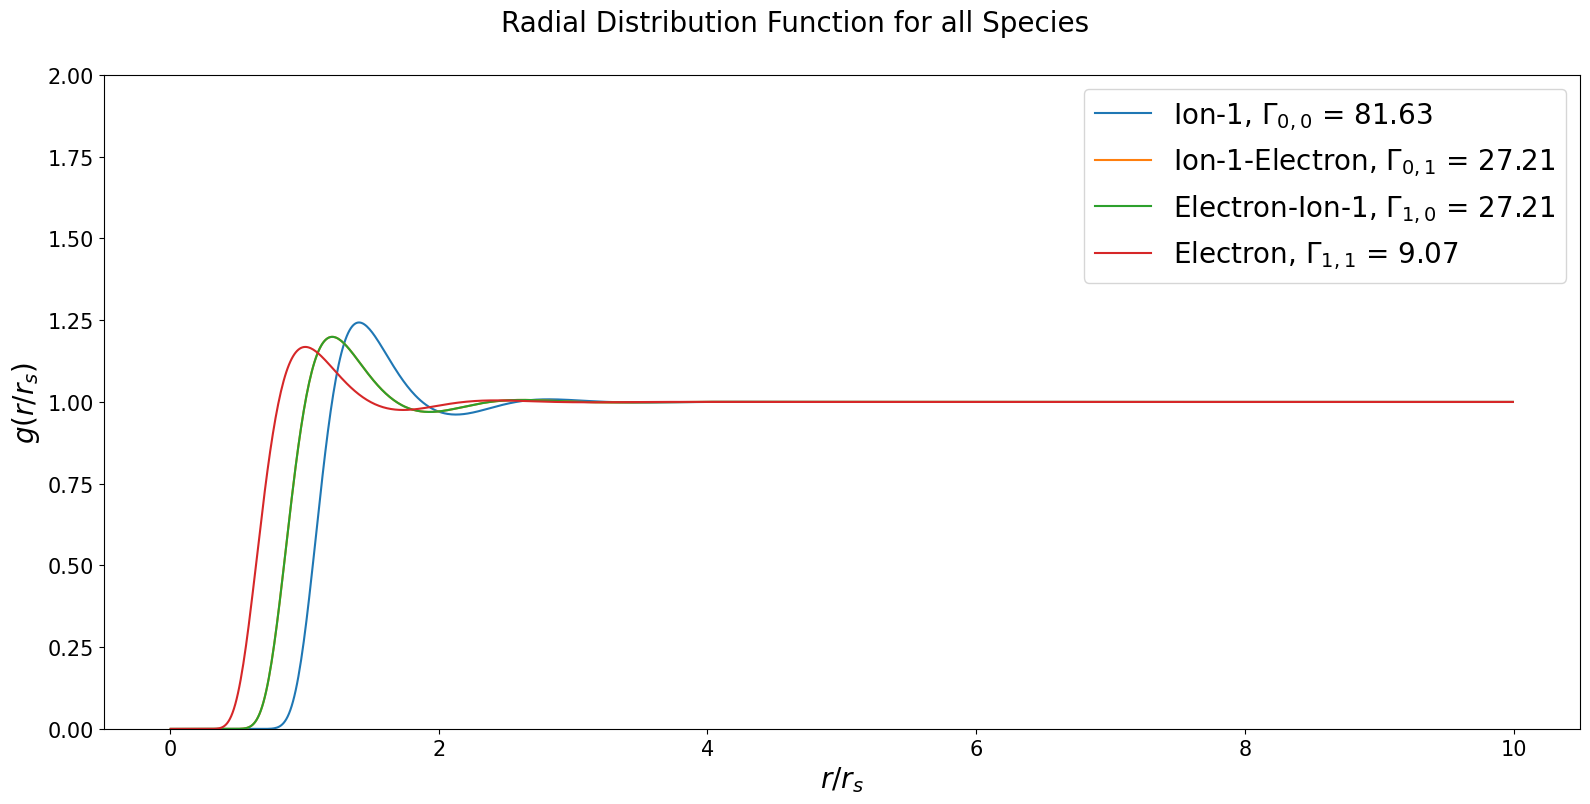

In [7]:
# print(hnc.c_r_matrix)

h_r_matrix = hnc2.h_r_matrix
c_r_matrix = hnc2.c_r_matrix

# To get the radial distribution function g(r), you can add 1 to the h_r_matrix:
g_r_matrix = h_r_matrix + 1

# To visualize the results, you can use matplotlib to plot the g(r) function:
# hnc2.plot_species((0,0))
# hnc2.plot_species_convergence((0,0))
hnc2.plot_g_all_species()

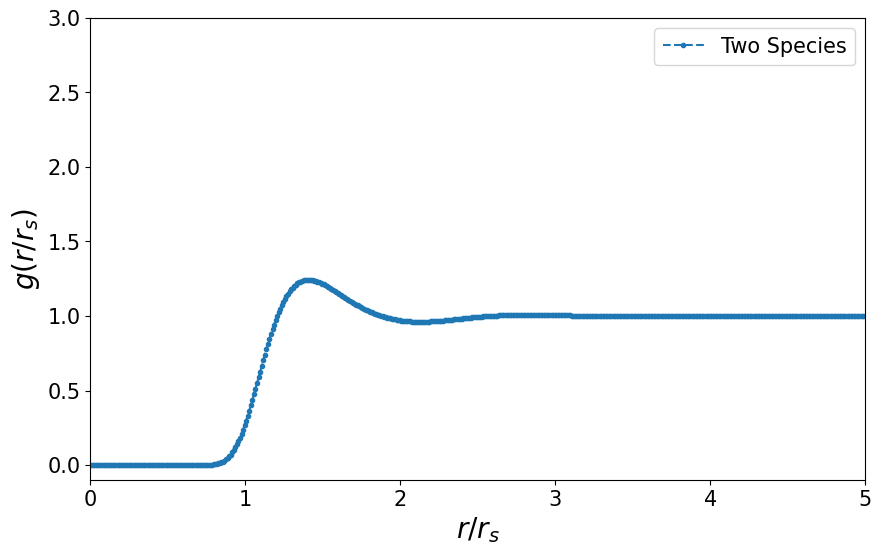

In [8]:
fig, ax = plt.subplots(figsize=(10,6))

# MM_r, MM_g = np.loadtxt("/home/zach/plasma/atomic_forces/average_atom/jupyter/Murillo_HNC.txt").T
# ax.plot(MM_r[::3], MM_g[::3], 'k.', label="MM HNC- One Species")
# ax.plot(hnc.r_array, hnc.h_r_matrix[0,0]+1, label="One Species")
ax.plot(hnc2.r_array, hnc2.h_r_matrix[0,0]+1,'--.', label="Two Species")
ax.set_ylabel(r'$g(r/r_s)$',fontsize=20)
ax.set_xlabel(r'$r/r_s$',fontsize=20)
ax.set_ylim(-0.1,3)
ax.set_xlim(0,5)
ax.tick_params(labelsize=15)
ax.legend(fontsize=15)

# Effective Potentials

In [9]:
# fig, ax = plt.subplots()

# ax.plot(hnc2.r_array, 1+hnc2.heff_r_matrix[0,0],label= 'h')
# ax.plot(hnc2.r_array, hnc2.ceff_r_matrix[0,0],label='c')
# ax.plot(hnc2.r_array,np.log(1+hnc2.heff_r_matrix)[0,0],label='log(1+h)')
# ax.set_yscale('symlog',linthresh=1e-5)
# ax.set_xlim(1e-1,2)
# # ax.set_xscale('log')
# ax.legend()

In [10]:
hnc2.invert_HNC( 1)

/home/zach/plasma/hnc/hnc_n_multiscale.py:254: RuntimeWarning: divide by zero encountered in log
  self.βueff_r_matrix[ieff,jeff]   = self.heff_r_matrix[ieff,jeff] - self.ceff_r_matrix[ieff,jeff] - np.log(1+self.heff_r_matrix[ieff,jeff]) #  h_r, c_r -> βu_r


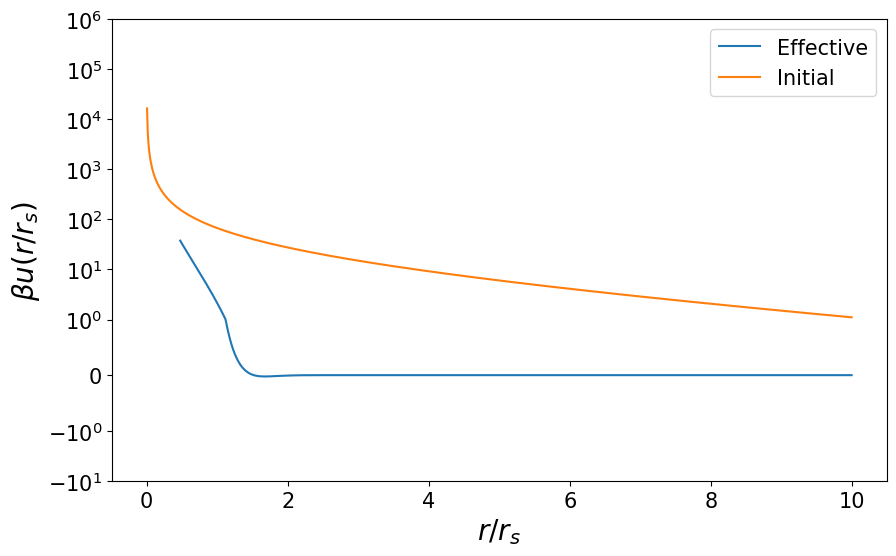

In [11]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(hnc2.r_array, hnc2.βueff_r_matrix[0,0], label="Effective")
ax.plot(hnc2.r_array, hnc2.βu_r_matrix[0,0], label="Initial")
ax.set_ylabel(r'$\beta u(r/r_s)$',fontsize=20)
ax.set_xlabel(r'$r/r_s$',fontsize=20)
ax.set_ylim(-1e1,1e6)
ax.set_yscale('symlog',linthresh=1)
ax.tick_params(labelsize=15)
ax.legend(fontsize=15)

In [12]:
(1+hnc2.heff_r_matrix)/np.exp(hnc2.heff_r_matrix -hnc2.ceff_r_matrix  - hnc2.βueff_r_matrix  )

/tmp/ipykernel_116201/1840389876.py:1: RuntimeWarning: invalid value encountered in divide
  (1+hnc2.heff_r_matrix)/np.exp(hnc2.heff_r_matrix -hnc2.ceff_r_matrix  - hnc2.βueff_r_matrix  )


array([[[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1., 

In [13]:
hnc2.βueff_r_matrix/ ( hnc2.heff_r_matrix + hnc2.ceff_r_matrix - np.log(1+hnc2.heff_r_matrix))

/tmp/ipykernel_116201/971221802.py:1: RuntimeWarning: divide by zero encountered in log
  hnc2.βueff_r_matrix/ ( hnc2.heff_r_matrix + hnc2.ceff_r_matrix - np.log(1+hnc2.heff_r_matrix))
/tmp/ipykernel_116201/971221802.py:1: RuntimeWarning: invalid value encountered in divide
  hnc2.βueff_r_matrix/ ( hnc2.heff_r_matrix + hnc2.ceff_r_matrix - np.log(1+hnc2.heff_r_matrix))


array([[[            nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,  1.18281967e+00,
          1.19438583e+00,  1.20573765e+0

# Check!

In [14]:
N_species = 1
Gamma = np.array(  [[1]])
names = ["Ion Effective"] 
kappa = 1
rho = np.array([3/(4*np.pi)])
hnc_check = HNC_solver(N_species, Gamma=Gamma, kappa=kappa, tol=1e-3, kappa_multiscale=1,
                       rho = rho, num_iterations=int(1e4), R_max=10, N_bins=1000, names=names)
hnc_check.βu_r_matrix = np.nan_to_num( hnc2.βueff_r_matrix,nan = -np.log(1.e-16), posinf=-np.log(1e-16) ).copy()
hnc_check.split_βu_matrix()
hnc_check.get_βu_k_matrices()

hnc_check.HNC_solve()


Err in c_r: 7.628
Err in c_r: 6.662
Err in c_r: 6.601
Err in c_r: 6.541
Err in c_r: 6.481
Err in c_r: 6.422
Err in c_r: 6.364
Err in c_r: 6.305
Err in c_r: 6.248
Err in c_r: 6.191
Err in c_r: 6.134
Err in c_r: 6.078
Err in c_r: 6.022
Err in c_r: 5.967
Err in c_r: 5.912
Err in c_r: 5.858
Err in c_r: 5.804
Err in c_r: 5.751
Err in c_r: 5.698
Err in c_r: 5.646
Err in c_r: 5.594
Err in c_r: 5.543
Err in c_r: 5.492
Err in c_r: 5.441
Err in c_r: 5.391
Err in c_r: 5.342
Err in c_r: 5.292
Err in c_r: 5.244
Err in c_r: 5.195
Err in c_r: 5.148
Err in c_r: 5.100
Err in c_r: 5.053
Err in c_r: 5.007
Err in c_r: 4.961
Err in c_r: 4.915
Err in c_r: 4.870
Err in c_r: 4.825
Err in c_r: 4.780
Err in c_r: 4.736
Err in c_r: 4.692
Err in c_r: 4.649
Err in c_r: 4.606
Err in c_r: 4.564
Err in c_r: 4.522
Err in c_r: 4.480
Err in c_r: 4.439
Err in c_r: 4.398
Err in c_r: 4.357
Err in c_r: 4.317
Err in c_r: 4.277
Err in c_r: 4.238
Err in c_r: 4.199
Err in c_r: 4.160
Err in c_r: 4.121
Err in c_r: 4.083
Err in c_r

Err in c_r: 0.212
Err in c_r: 0.211
Err in c_r: 0.210
Err in c_r: 0.209
Err in c_r: 0.209
Err in c_r: 0.208
Err in c_r: 0.207
Err in c_r: 0.207
Err in c_r: 0.206
Err in c_r: 0.205
Err in c_r: 0.205
Err in c_r: 0.204
Err in c_r: 0.203
Err in c_r: 0.202
Err in c_r: 0.202
Err in c_r: 0.201
Err in c_r: 0.200
Err in c_r: 0.200
Err in c_r: 0.199
Err in c_r: 0.198
Err in c_r: 0.198
Err in c_r: 0.197
Err in c_r: 0.197
Err in c_r: 0.196
Err in c_r: 0.195
Err in c_r: 0.195
Err in c_r: 0.194
Err in c_r: 0.193
Err in c_r: 0.193
Err in c_r: 0.192
Err in c_r: 0.192
Err in c_r: 0.191
Err in c_r: 0.190
Err in c_r: 0.190
Err in c_r: 0.189
Err in c_r: 0.188
Err in c_r: 0.188
Err in c_r: 0.187
Err in c_r: 0.187
Err in c_r: 0.186
Err in c_r: 0.186
Err in c_r: 0.185
Err in c_r: 0.184
Err in c_r: 0.184
Err in c_r: 0.183
Err in c_r: 0.183
Err in c_r: 0.182
Err in c_r: 0.182
Err in c_r: 0.181
Err in c_r: 0.180
Err in c_r: 0.180
Err in c_r: 0.179
Err in c_r: 0.179
Err in c_r: 0.178
Err in c_r: 0.178
Err in c_r

Err in c_r: 0.056
Err in c_r: 0.056
Err in c_r: 0.056
Err in c_r: 0.056
Err in c_r: 0.055
Err in c_r: 0.055
Err in c_r: 0.055
Err in c_r: 0.055
Err in c_r: 0.055
Err in c_r: 0.055
Err in c_r: 0.055
Err in c_r: 0.054
Err in c_r: 0.054
Err in c_r: 0.054
Err in c_r: 0.054
Err in c_r: 0.054
Err in c_r: 0.054
Err in c_r: 0.054
Err in c_r: 0.053
Err in c_r: 0.053
Err in c_r: 0.053
Err in c_r: 0.053
Err in c_r: 0.053
Err in c_r: 0.053
Err in c_r: 0.053
Err in c_r: 0.052
Err in c_r: 0.052
Err in c_r: 0.052
Err in c_r: 0.052
Err in c_r: 0.052
Err in c_r: 0.052
Err in c_r: 0.052
Err in c_r: 0.051
Err in c_r: 0.051
Err in c_r: 0.051
Err in c_r: 0.051
Err in c_r: 0.051
Err in c_r: 0.051
Err in c_r: 0.051
Err in c_r: 0.051
Err in c_r: 0.050
Err in c_r: 0.050
Err in c_r: 0.050
Err in c_r: 0.050
Err in c_r: 0.050
Err in c_r: 0.050
Err in c_r: 0.050
Err in c_r: 0.050
Err in c_r: 0.049
Err in c_r: 0.049
Err in c_r: 0.049
Err in c_r: 0.049
Err in c_r: 0.049
Err in c_r: 0.049
Err in c_r: 0.049
Err in c_r

Err in c_r: 0.016
Err in c_r: 0.016
Err in c_r: 0.016
Err in c_r: 0.015
Err in c_r: 0.015
Err in c_r: 0.015
Err in c_r: 0.015
Err in c_r: 0.015
Err in c_r: 0.015
Err in c_r: 0.015
Err in c_r: 0.015
Err in c_r: 0.015
Err in c_r: 0.015
Err in c_r: 0.015
Err in c_r: 0.015
Err in c_r: 0.015
Err in c_r: 0.015
Err in c_r: 0.015
Err in c_r: 0.015
Err in c_r: 0.015
Err in c_r: 0.015
Err in c_r: 0.015
Err in c_r: 0.015
Err in c_r: 0.015
Err in c_r: 0.015
Err in c_r: 0.015
Err in c_r: 0.015
Err in c_r: 0.015
Err in c_r: 0.014
Err in c_r: 0.014
Err in c_r: 0.014
Err in c_r: 0.014
Err in c_r: 0.014
Err in c_r: 0.014
Err in c_r: 0.014
Err in c_r: 0.014
Err in c_r: 0.014
Err in c_r: 0.014
Err in c_r: 0.014
Err in c_r: 0.014
Err in c_r: 0.014
Err in c_r: 0.014
Err in c_r: 0.014
Err in c_r: 0.014
Err in c_r: 0.014
Err in c_r: 0.014
Err in c_r: 0.014
Err in c_r: 0.014
Err in c_r: 0.014
Err in c_r: 0.014
Err in c_r: 0.014
Err in c_r: 0.014
Err in c_r: 0.014
Err in c_r: 0.014
Err in c_r: 0.014
Err in c_r

Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r: 0.004
Err in c_r

Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r

In [15]:
hnc2.ceff_k_matrix

array([[[-1.34594355e+01, -1.31457846e+01, -1.25320916e+01,
         -1.16454840e+01, -1.05262416e+01, -9.22681916e+00,
         -7.80986020e+00, -6.34487761e+00, -4.90352469e+00,
         -3.55377805e+00, -2.35379122e+00, -1.34648506e+00,
         -5.55952803e-01,  1.35792851e-02,  3.76082169e-01,
          5.59814850e-01,  6.02086775e-01,  5.43742441e-01,
          4.24272319e-01,  2.78133305e-01,  1.32502748e-01,
          6.39548107e-03, -8.91101001e-02, -1.49864642e-01,
         -1.77180467e-01, -1.76176015e-01, -1.54142052e-01,
         -1.19083683e-01, -7.85463188e-02, -3.87923187e-02,
         -4.35018674e-03,  2.20909477e-02,  3.95137611e-02,
          4.82316917e-02,  4.94761838e-02,  4.49940311e-02,
          3.67060192e-02,  2.64489592e-02,  1.58026319e-02,
          5.99214368e-03, -2.14788154e-03, -8.16134671e-03,
         -1.19243255e-02, -1.35767989e-02, -1.34440181e-02,
         -1.19576752e-02, -9.58508231e-03, -6.77201141e-03,
         -3.90204979e-03, -1.27273208e-0

In [16]:
ieff, jeff = slice(None, hnc2.Neff_species), slice(None,hnc2.Neff_species)

I_plus_h_rho_inverse = hnc2.invert_matrix(hnc2.I[ieff, jeff,np.newaxis] + hnc2.heff_k_matrix[ieff,jeff]*hnc2.rhoeff[ieff,np.newaxis,np.newaxis])
I_plus_h_rho_inverse
hnc2.A_times_B(I_plus_h_rho_inverse, hnc2.heff_k_matrix)

array([[[-1.34594355e+01, -1.31457846e+01, -1.25320916e+01,
         -1.16454840e+01, -1.05262416e+01, -9.22681916e+00,
         -7.80986020e+00, -6.34487761e+00, -4.90352469e+00,
         -3.55377805e+00, -2.35379122e+00, -1.34648506e+00,
         -5.55952803e-01,  1.35792851e-02,  3.76082169e-01,
          5.59814850e-01,  6.02086775e-01,  5.43742441e-01,
          4.24272319e-01,  2.78133305e-01,  1.32502748e-01,
          6.39548107e-03, -8.91101001e-02, -1.49864642e-01,
         -1.77180467e-01, -1.76176015e-01, -1.54142052e-01,
         -1.19083683e-01, -7.85463188e-02, -3.87923187e-02,
         -4.35018674e-03,  2.20909477e-02,  3.95137611e-02,
          4.82316917e-02,  4.94761838e-02,  4.49940311e-02,
          3.67060192e-02,  2.64489592e-02,  1.58026319e-02,
          5.99214368e-03, -2.14788154e-03, -8.16134671e-03,
         -1.19243255e-02, -1.35767989e-02, -1.34440181e-02,
         -1.19576752e-02, -9.58508231e-03, -6.77201141e-03,
         -3.90204979e-03, -1.27273208e-0

In [17]:
((hnc2.heff_r_matrix+1)/np.exp(-hnc2.βueff_r_matrix + hnc2.heff_r_matrix - hnc2.ceff_r_matrix))

/tmp/ipykernel_116201/4148011428.py:1: RuntimeWarning: invalid value encountered in divide
  ((hnc2.heff_r_matrix+1)/np.exp(-hnc2.βueff_r_matrix + hnc2.heff_r_matrix - hnc2.ceff_r_matrix))


array([[[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1., 

In [18]:
np.array([hnc_check.r_array, hnc_check.βu_r_matrix[0,0]])

array([[ 5.00000000e-03,  1.50000000e-02,  2.50000000e-02, ...,
         9.97500000e+00,  9.98500000e+00,  9.99500000e+00],
       [ 3.68413615e+01,  3.68413615e+01,  3.68413615e+01, ...,
        -4.48728643e-13, -4.70396601e-13, -4.92615146e-13]])

In [19]:
hnc2.heff_k_matrix

array([[[-3.19458468e+00, -3.17659558e+00, -3.13944582e+00,
         -3.08068995e+00, -2.99640655e+00, -2.88091347e+00,
         -2.72646213e+00, -2.52308708e+00, -2.25903265e+00,
         -1.92262182e+00, -1.50697973e+00, -1.01894543e+00,
         -4.90810493e-01,  1.36234498e-02,  4.13178583e-01,
          6.46173294e-01,  7.03156878e-01,  6.24854092e-01,
          4.72089066e-01,  2.97914671e-01,  1.36831085e-01,
          6.40526068e-03, -8.72539068e-02, -1.44688058e-01,
         -1.69990103e-01, -1.69065310e-01, -1.48671147e-01,
         -1.15791821e-01, -7.71005636e-02, -3.84363602e-02,
         -4.34567362e-03,  2.22080692e-02,  3.98900526e-02,
          4.87935231e-02,  5.00675603e-02,  4.54825839e-02,
          3.70305145e-02,  2.66170251e-02,  1.58624747e-02,
          6.00072783e-03, -2.14678073e-03, -8.14547624e-03,
         -1.18904766e-02, -1.35329357e-02, -1.34010073e-02,
         -1.19236369e-02, -9.56319913e-03, -6.76108078e-03,
         -3.89841824e-03, -1.27234549e-0

In [20]:
hnc2.ceff_r_matrix

array([[[-5.94851493e+00, -4.29737961e+00, -3.96559780e+00,
         -3.82174327e+00, -3.74010509e+00, -3.68640185e+00,
         -3.64745192e+00, -3.61710748e+00, -3.59211750e+00,
         -3.57060350e+00, -3.55140631e+00, -3.53377364e+00,
         -3.51719755e+00, -3.50132419e+00, -3.48590085e+00,
         -3.47074347e+00, -3.45571598e+00, -3.44071667e+00,
         -3.42566901e+00, -3.41051522e+00, -3.39521180e+00,
         -3.37972617e+00, -3.36403431e+00, -3.34811893e+00,
         -3.33196810e+00, -3.31557416e+00, -3.29893294e+00,
         -3.28204306e+00, -3.26490543e+00, -3.24752282e+00,
         -3.22989952e+00, -3.21204105e+00, -3.19395394e+00,
         -3.17564551e+00, -3.15712375e+00, -3.13839713e+00,
         -3.11947452e+00, -3.10036509e+00, -3.08107821e+00,
         -3.06162338e+00, -3.04201018e+00, -3.02224823e+00,
         -3.00234710e+00, -2.98231633e+00, -2.96216534e+00,
         -2.94190346e+00, -2.92153986e+00, -2.90108358e+00,
         -2.88054345e+00, -2.85992814e+0

In [37]:
np.savetxt("example_veff_1eV_rs_3aBohr.txt", np.array([hnc_check.r_array, hnc_check.βu_r_matrix[0,0]]).T,header="r/r_s,   beta v_ii^eff   (both unitless)",delimiter=', ' )

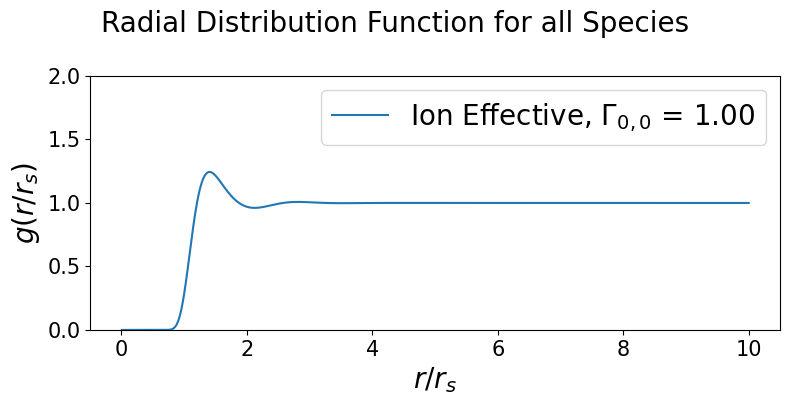

In [22]:
hnc_check.plot_g_all_species()

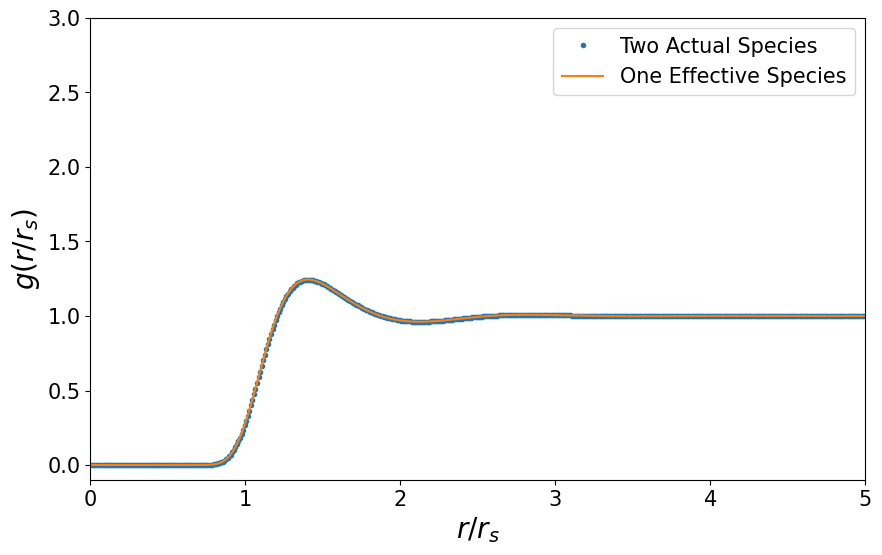

In [36]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(hnc2.r_array, hnc2.h_r_matrix[0,0]+1,'.', label="Two Actual Species")
ax.plot(hnc_check.r_array, hnc_check.h_r_matrix[0,0]+1,'-', label="One Effective Species")
ax.set_ylabel(r'$g(r/r_s)$',fontsize=20)
ax.set_xlabel(r'$r/r_s$',fontsize=20)
ax.set_ylim(-0.1,3)
ax.set_xlim(0,5)
ax.tick_params(labelsize=15)
ax.legend(fontsize=15)